# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to show the graphs in the notebook
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# The shape func returns the rows and columns of the DataFrame
df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# We can use the info function to find out about the datatypes of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three datatypes in the DataFrame,
* Order ID, Customer ID, Food Preparation Time and Delivery Time are integer values. These values must be round numbers.
* Cost of the Order is a floating point variable. These value can contain decimals.
* Restaurant Name, Cuisine Type, Day of the Week and Rating are objects. These values contain a mix of character and integer.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# To see the distinct values stored in the ratings column
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [5]:
# We are replacing the Not given value with nan
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].value_counts()

rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

In [6]:
# We can use this to find the total number of empty/nan values in our data
df.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
Since the rating column had values that were not given, we have replaced them with nan so that we can treat the column as integer. This will allow us to find the mean and perform various other functions on the column that might not be possible if it were an object datatype.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Creating a new column called total_time which shows us the time taken from order confimration till drop-off
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Shows us the mean, std, , min, max, Q1 and Q2 of the numerical datatypes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
total_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


In [9]:
# Comparing the statistical data of food_preparation_time, delivery_time and total_time
df[['food_preparation_time', 'delivery_time', 'total_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
food_preparation_time,1898.0,27.371970,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
total_time,1898.0,51.533720,6.833603,35.0,47.0,52.0,56.0,68.0


#### Observations:
* The quickest order preparation time is 20 mins and the longest order preparation time is 35 mins.
* The quickest order delivery time is 15 mins and the longest order delivery time is 33 mins.
* On an average it takes a similar amount of time to prepapre the meal as it takes to deliver it.
* On an average it takes the user 51.53 minutes to get his order after order confirmation with an error of 6.83 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# This is used to find the sum of the distinct values in the dataset
df['rating'].isna().sum()

736

In [8]:
# Percentage of the data that is missing
print('There is',round(df['rating'].isnull().mean() * 100, 2), '% of the data that is missing')

There is 38.78 % of the data that is missing


In [9]:
# To get the percentage breakdown of the ratings
df['rating'].value_counts(normalize=True, dropna=False) * 100

rating
NaN    38.777661
5.0    30.979979
4.0    20.337197
3.0     9.905163
Name: proportion, dtype: float64

#### Observations:
* There are 736 orders that have not been given a rating. That is around 38.78% of the data
* The highest rating recived is 5 at 30.98% of the data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

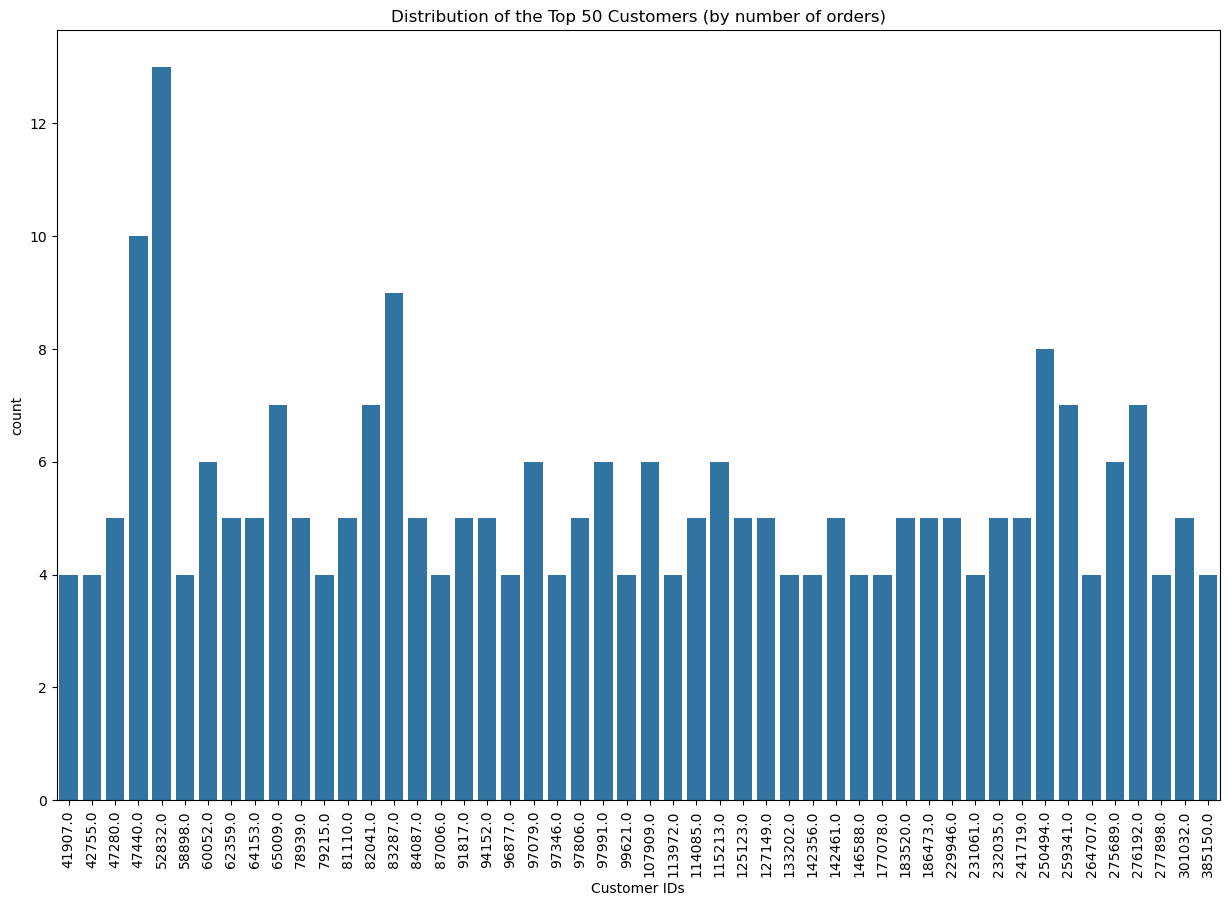

In [13]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df[df.isin(df['customer_id'].value_counts().head(50).index)], x='customer_id')
plt.xticks(rotation=90)
plt.xlabel('Customer IDs')
plt.title('Distribution of the Top 50 Customers (by number of orders)');

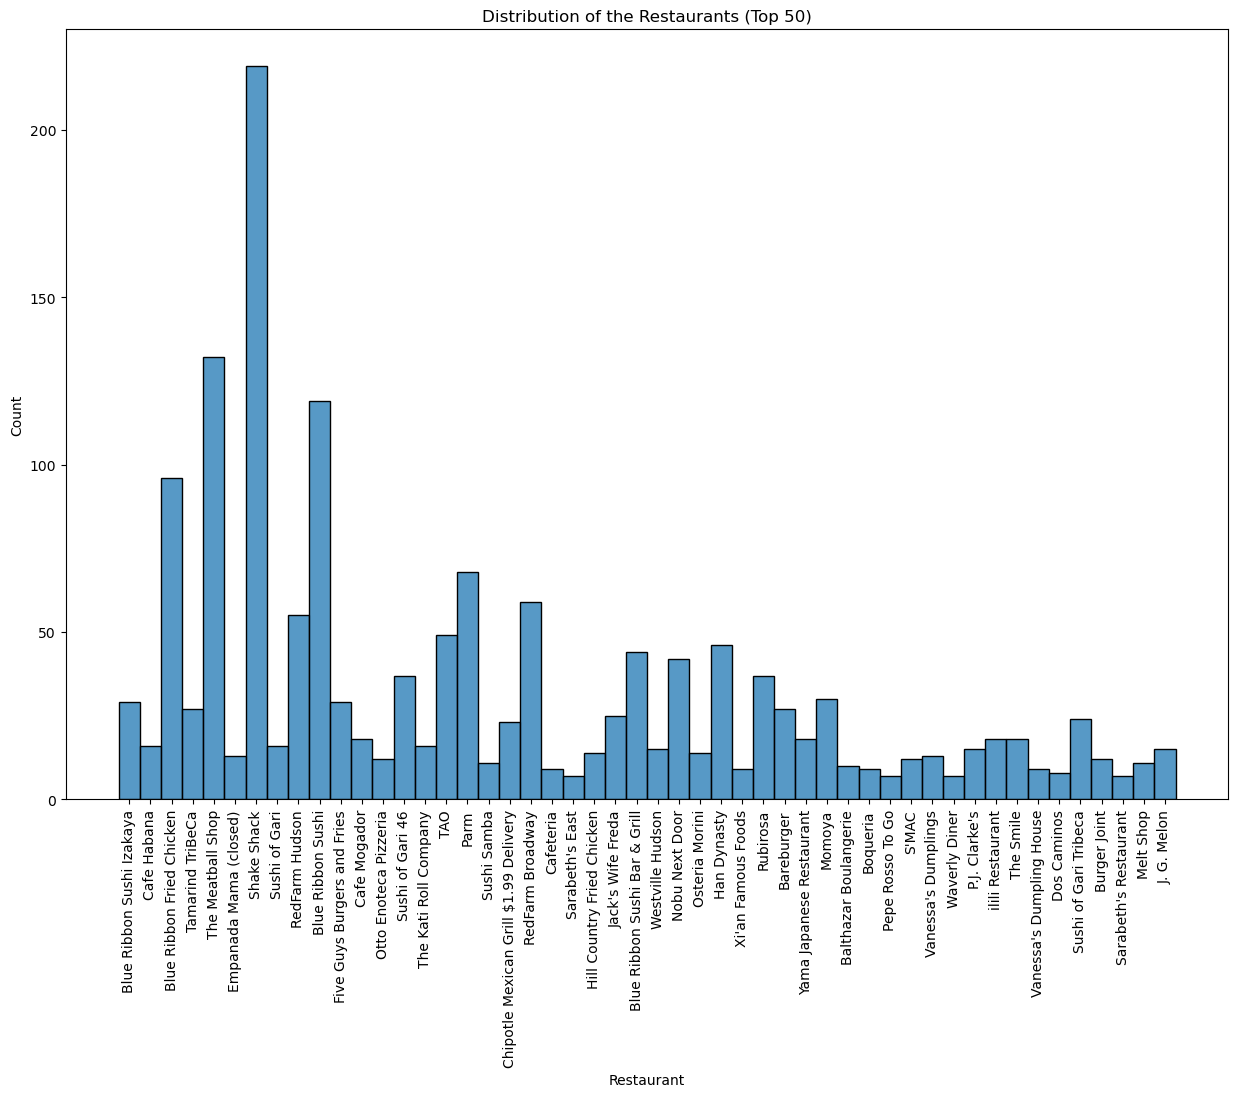

In [14]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df[df['restaurant_name'].isin(df['restaurant_name'].value_counts().iloc[0:50].index)], x='restaurant_name')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.title('Distribution of the Restaurants (Top 50)');

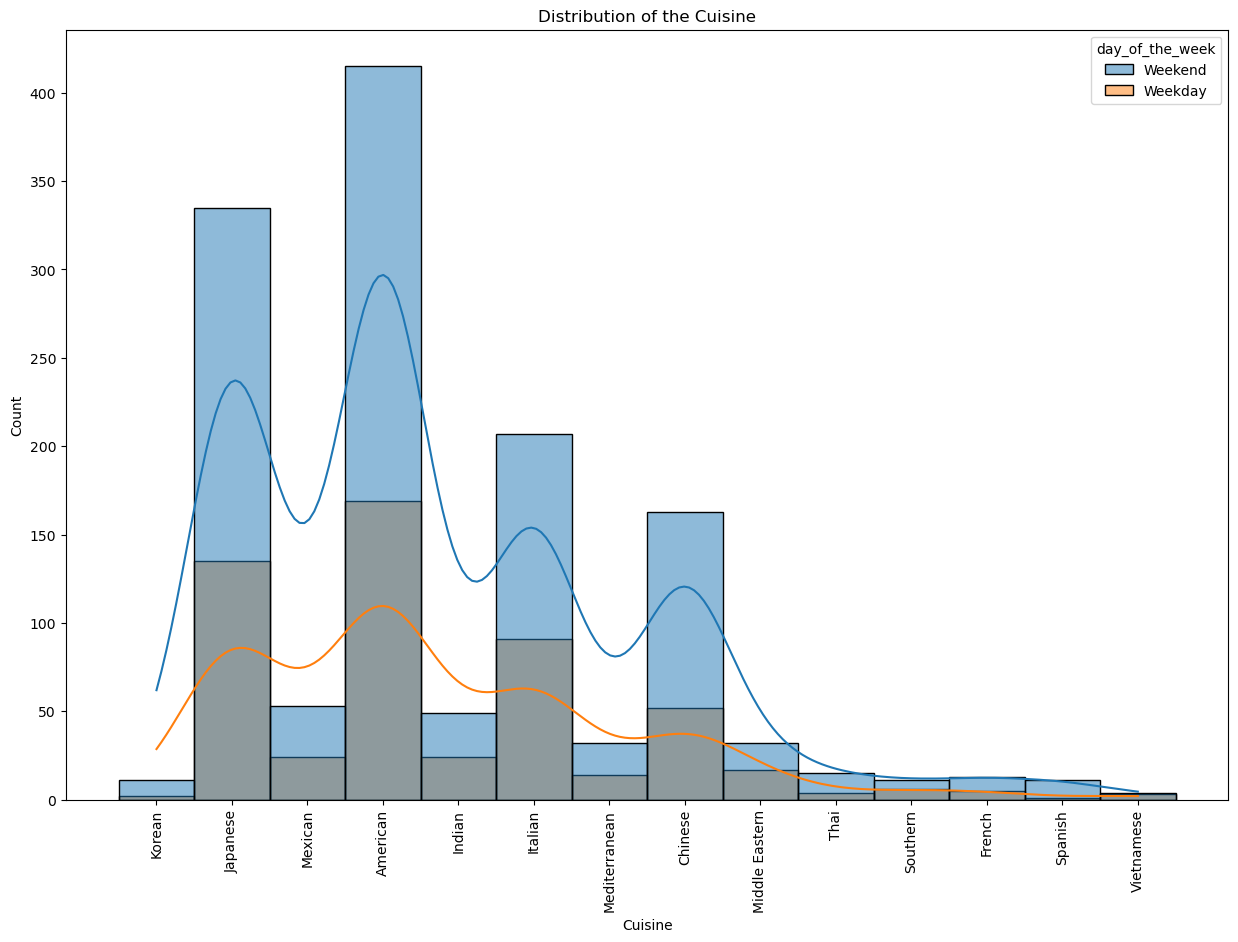

In [15]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='cuisine_type', kde=True, hue='day_of_the_week')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.title('Distribution of the Cuisine');

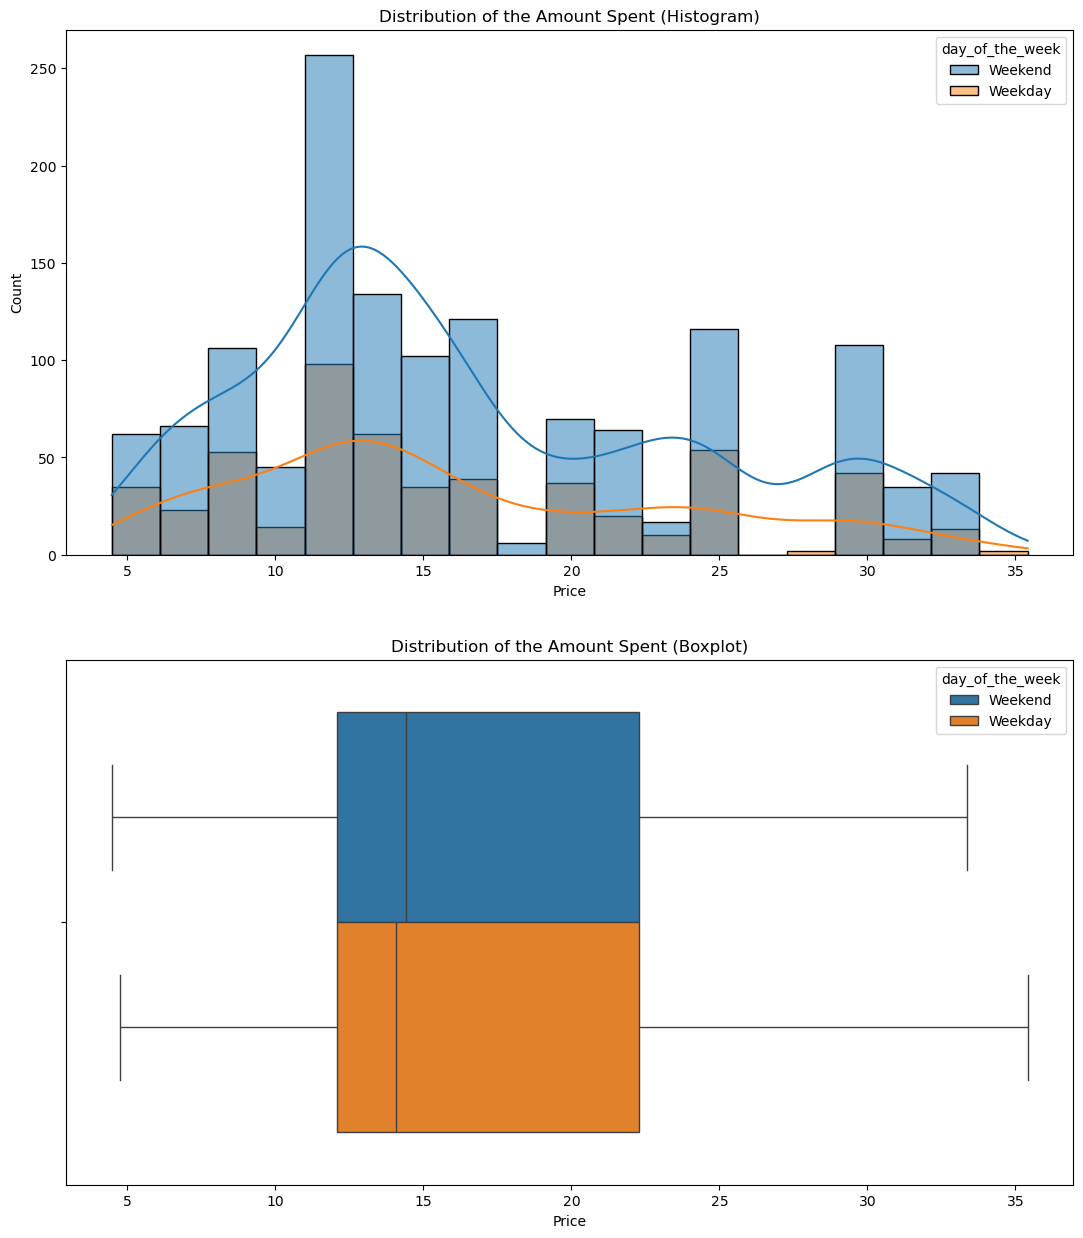

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(13, 15))
sns.histplot(data=df, x='cost_of_the_order', kde=True, ax=axes[0], hue='day_of_the_week')
axes[0].set_xlabel('Price')
axes[0].set_title('Distribution of the Amount Spent (Histogram)')

sns.boxplot(data=df, x='cost_of_the_order', ax=axes[1], hue='day_of_the_week')
axes[1].set_xlabel('Price')
axes[1].set_title('Distribution of the Amount Spent (Boxplot)');

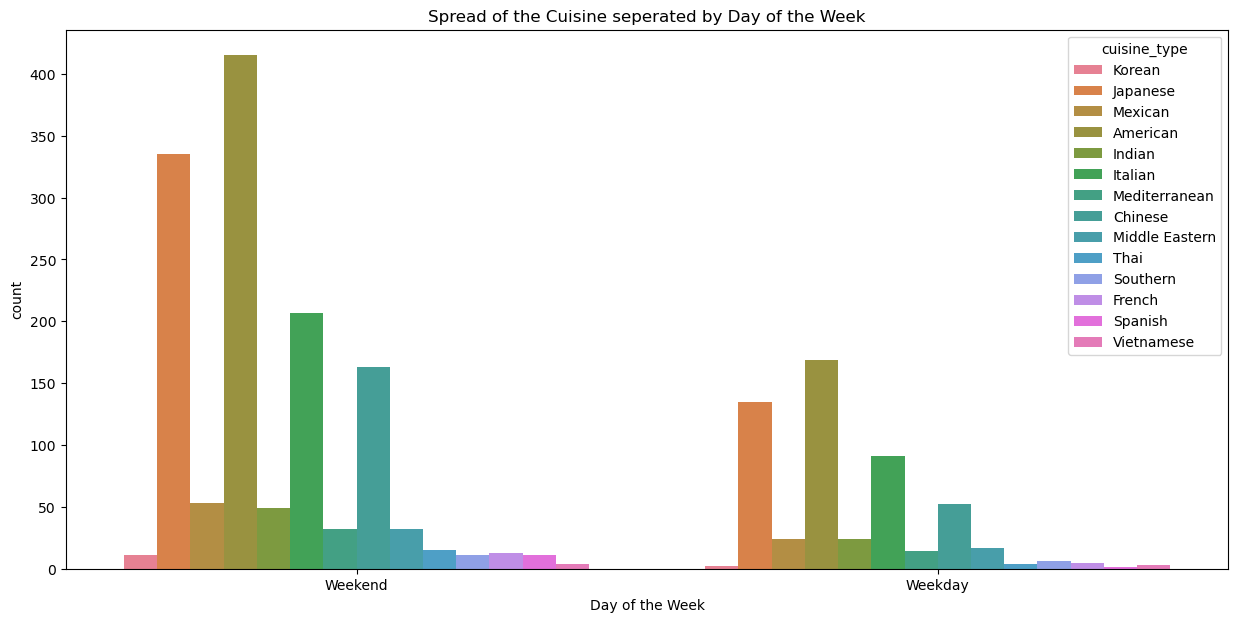

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type')
plt.xlabel('Day of the Week')
plt.title('Spread of the Cuisine seperated by Day of the Week');

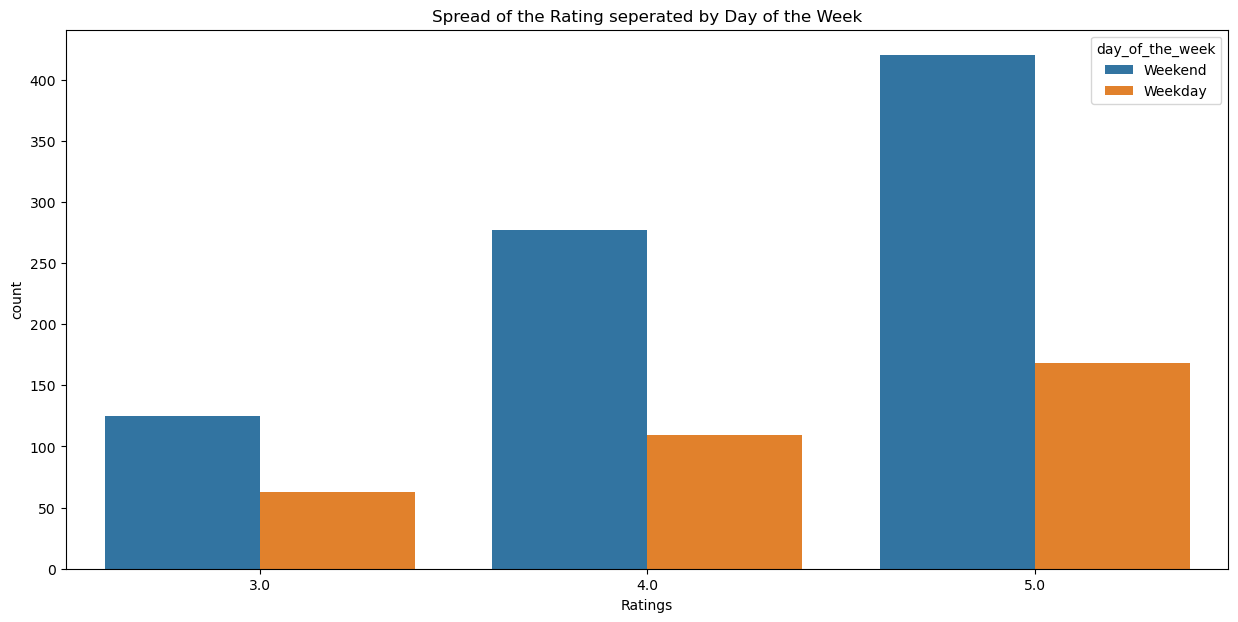

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='rating', hue='day_of_the_week')
plt.xlabel('Ratings')
plt.title('Spread of the Rating seperated by Day of the Week');

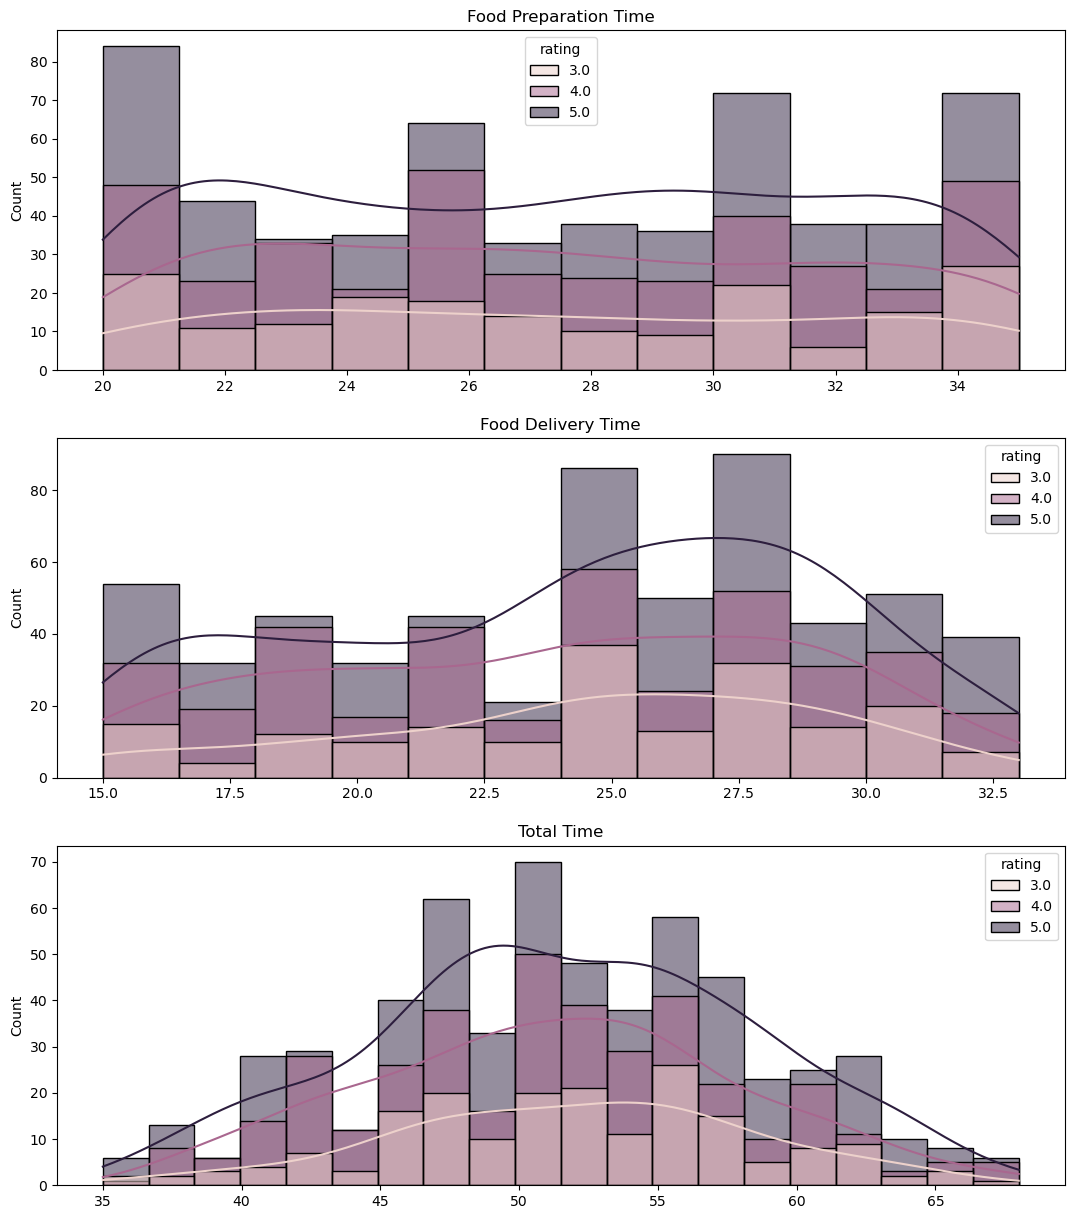

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(13, 15))
sns.histplot(data=df, x='food_preparation_time', hue='rating', kde=True, ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_title('Food Preparation Time')

sns.histplot(data=df, x='delivery_time', hue='rating', kde=True, ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_title('Food Delivery Time')

sns.histplot(data=df, x='total_time', hue='rating', kde=True, ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_title('Total Time');

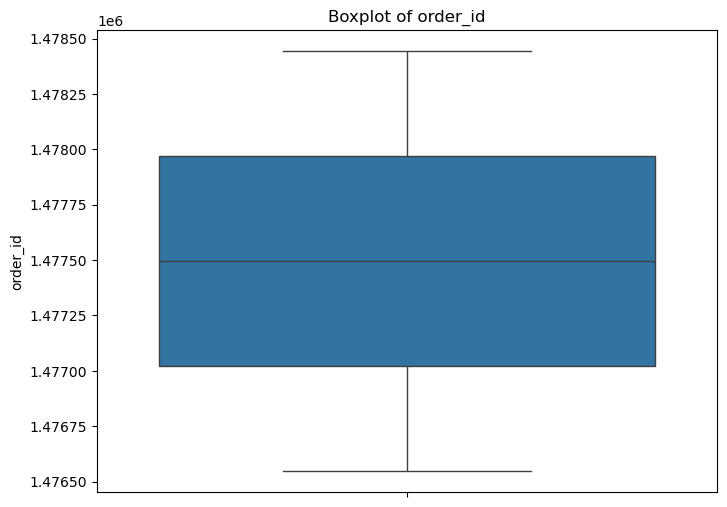

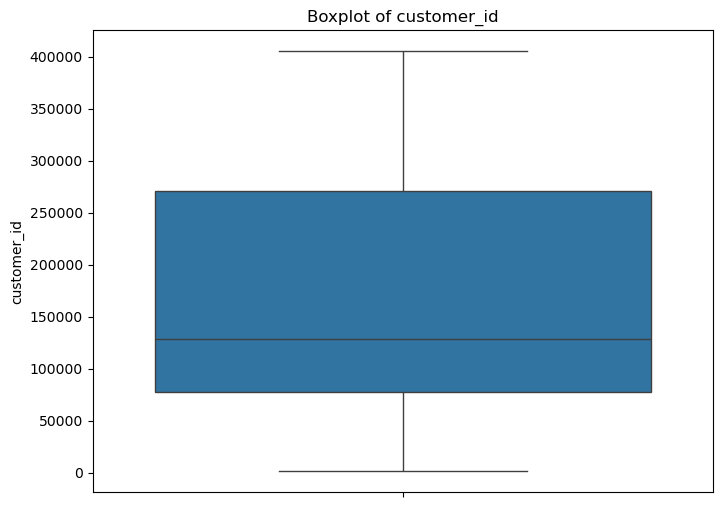

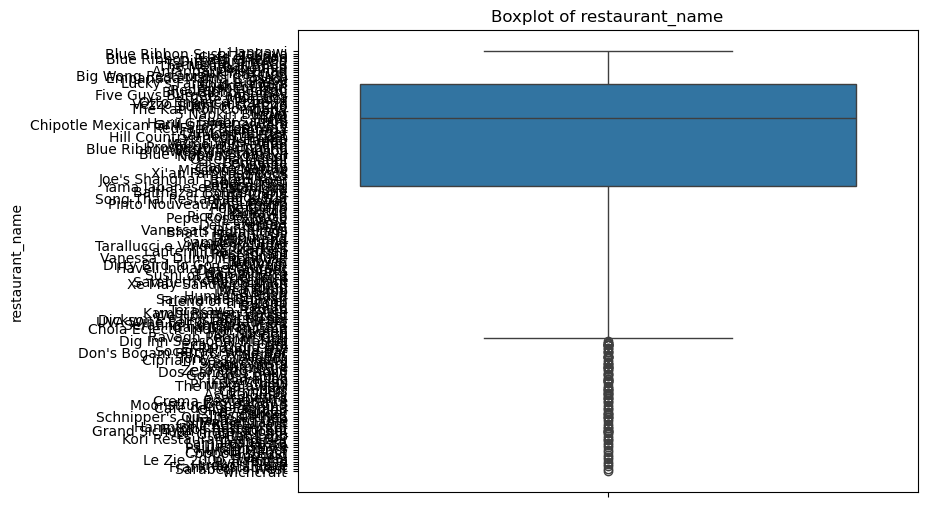

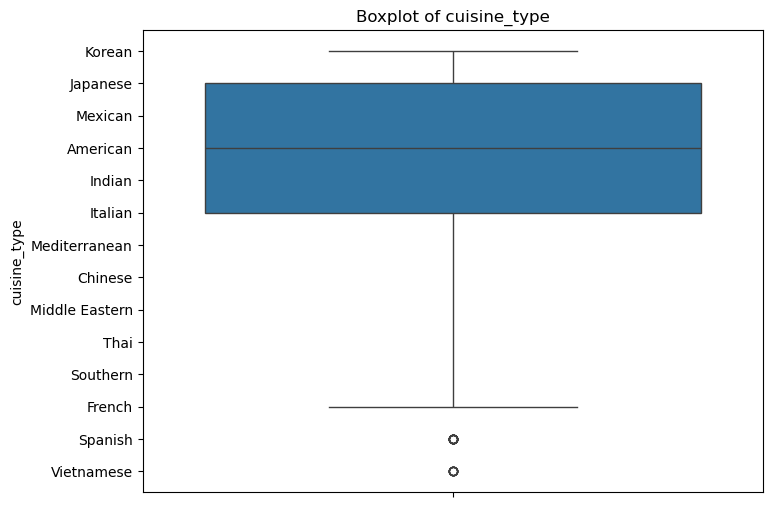

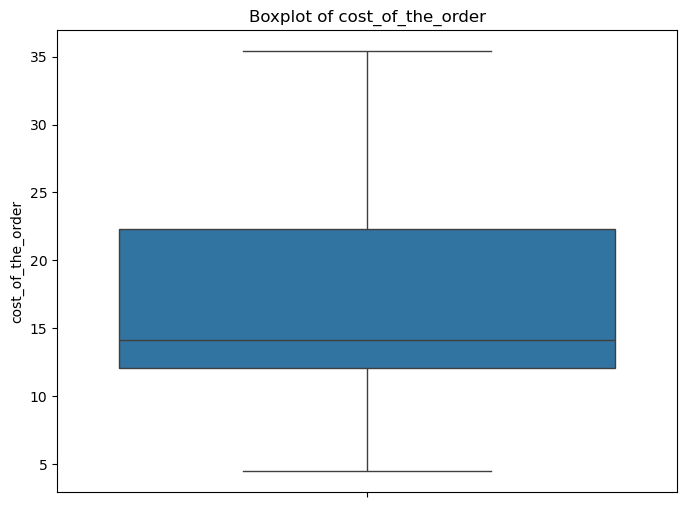

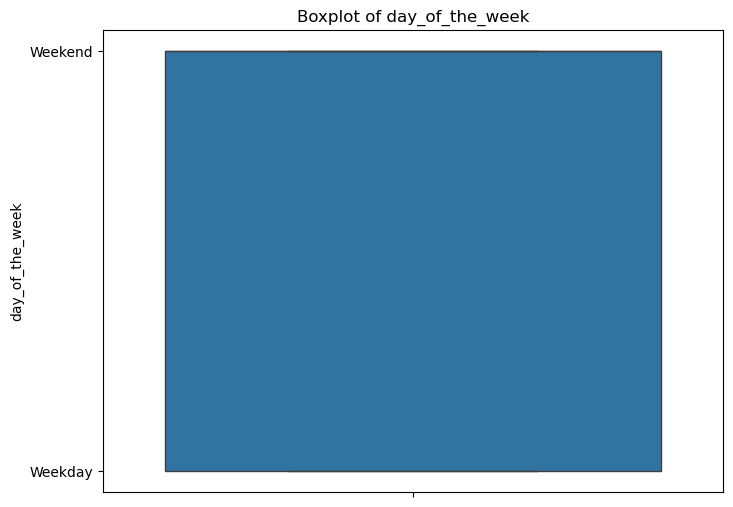

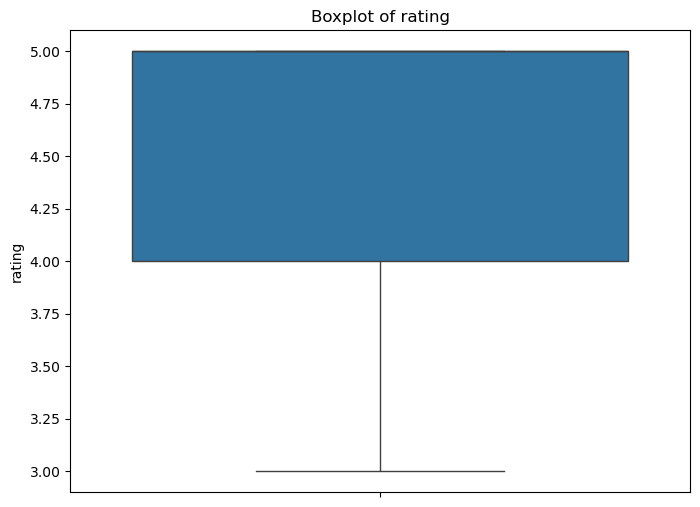

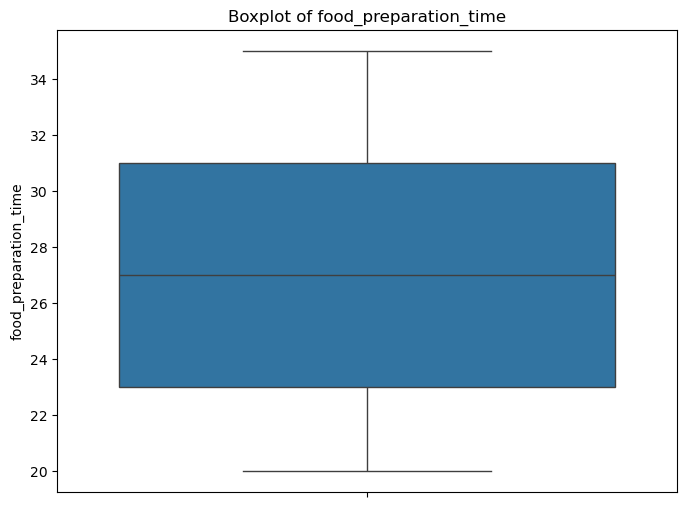

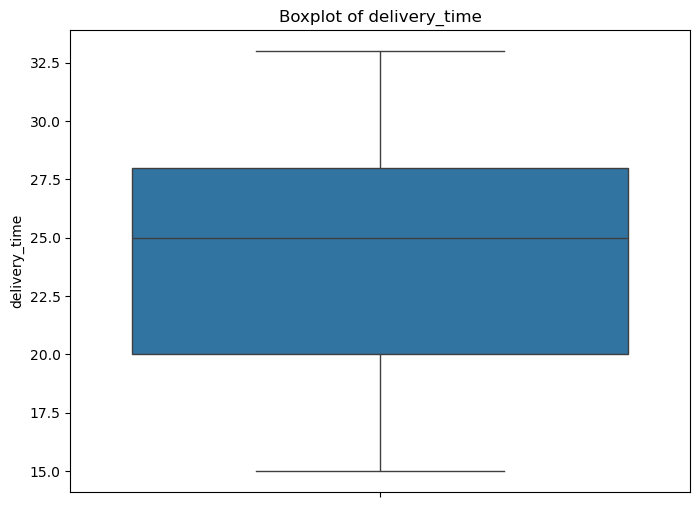

In [8]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Getting the top 5 restaurants ordered by the number of orders recieved
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [21]:
# Getting the percentage of orders taken by the top 5 most ordered restaurants
round(df['restaurant_name'].value_counts(normalize=True).head() * 100, 2)

restaurant_name
Shake Shack                  11.54
The Meatball Shop             6.95
Blue Ribbon Sushi             6.27
Blue Ribbon Fried Chicken     5.06
Parm                          3.58
Name: proportion, dtype: float64

#### Observations:
* Shake Shack is the most ordered restaurant, it has a 11.54% markey share
* The Meatball Shop is the second most ordered restaurant, it has a 6.95% markey share
* Blue Ribbon Sushi is the third most ordered restaurant, it has a 6.27% markey share
* Blue Ribbon Fried Chicken is the fourth most ordered restaurant, it has a 5.06% markey share
* Parm is the fifth most ordered restaurant, it has a 3.58% markey share

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Filtering and grouping by day of the week to find the most popular cuisine
df[df['day_of_the_week'] == 'Weekend'].groupby('day_of_the_week')['cuisine_type'].value_counts().head(1)

day_of_the_week  cuisine_type
Weekend          American        415
Name: count, dtype: int64

In [23]:
# Checking the percentage of american cuisine orders on the weekend
round(df[df.day_of_the_week == 'Weekend'].groupby('day_of_the_week')['cuisine_type'].value_counts(normalize=True).head(1) * 100, 2)

day_of_the_week  cuisine_type
Weekend          American        30.72
Name: proportion, dtype: float64

#### Observations:
The most popular cuisine on the weekends is American, about 30.72% of the orders are of that cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Percentage of orders >20
round(df[df['cost_of_the_order'] > 20]['cost_of_the_order'].count() / df['cost_of_the_order'].count() * 100, 2)

29.24

#### Observations:
There are 29.24% of the total orders placed on a app cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Checking the mean delivery time
round(df['delivery_time'].mean())

24

In [26]:
# Checking the mean preparation time
round(df['food_preparation_time'].mean())

27

In [27]:
# Checking the mean total time (sum of delivery and food preparation time)
round(df['total_time'].mean())

52

#### Observations:
* The mean order delivery time is 24 mins.
* The mean food preparation time is 27 mins.
* Overall, customers receive their orders within an average of 52 minutes from the time the order is confirmed.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Finding the top 3 most frequet customers
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [29]:
# Finding the percentage of the orders placed by the top 3 most frequet customers
round(df['customer_id'].value_counts(normalize=True).head(3) * 100, 2)

customer_id
52832    0.68
47440    0.53
83287    0.47
Name: proportion, dtype: float64

#### Observations:
* 52832, 47440 and 83287 are the most frequent customers with 13, 10 and 9 orders respectively
* They are 0.68%, 0.53% and 0.47% of the total orders placed respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


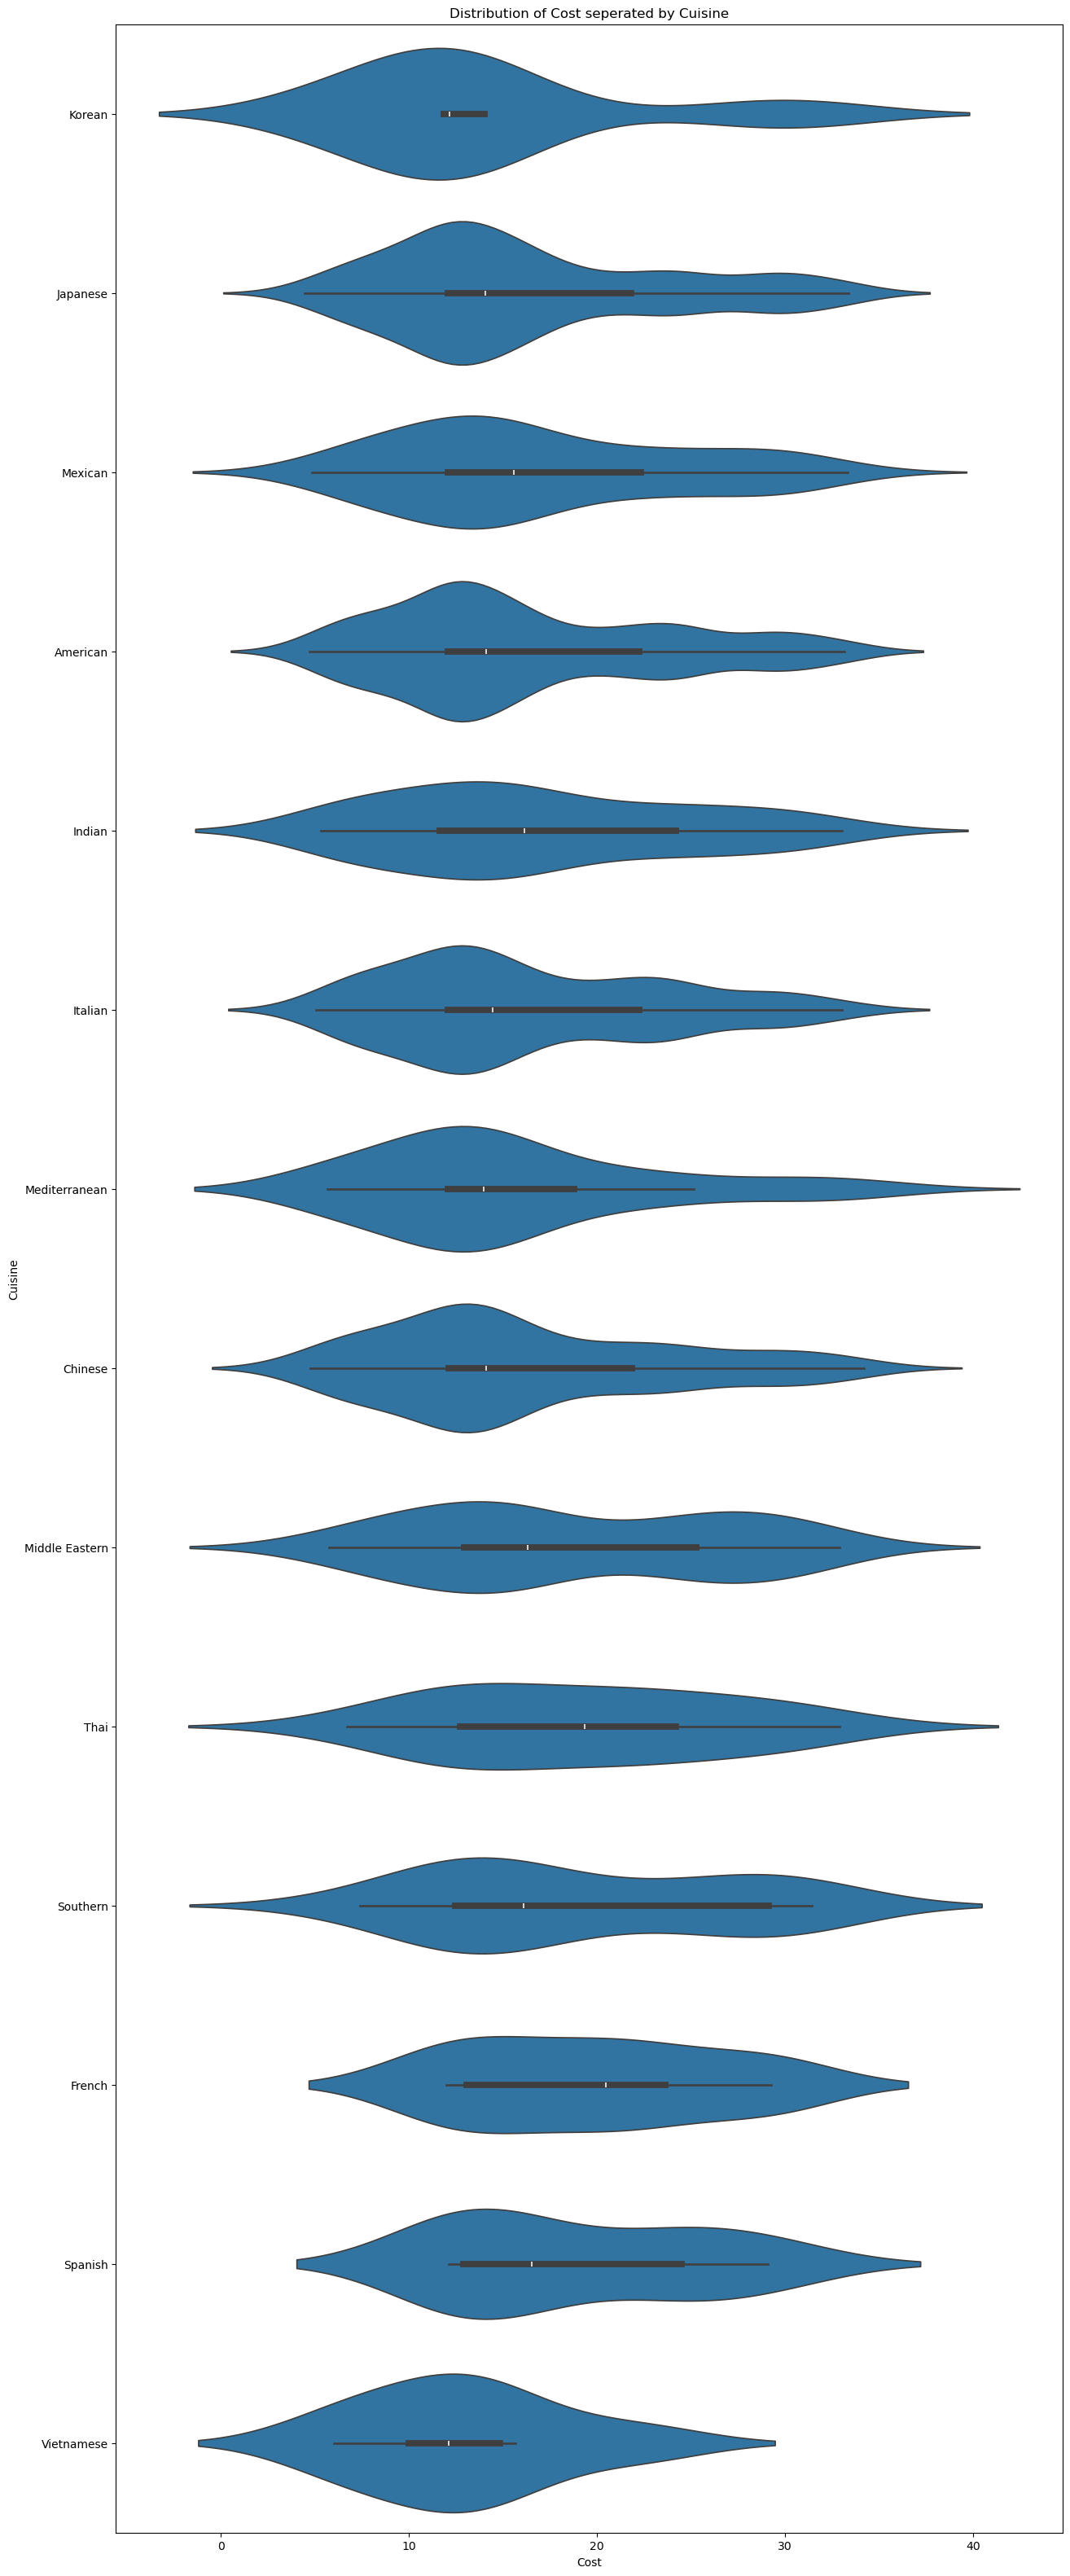

In [30]:
plt.figure(figsize=(15, 40))
sns.violinplot(data=df, x='cost_of_the_order', y='cuisine_type')
plt.xlabel('Cost')
plt.ylabel('Cuisine')
plt.title('Distribution of Cost seperated by Cuisine');

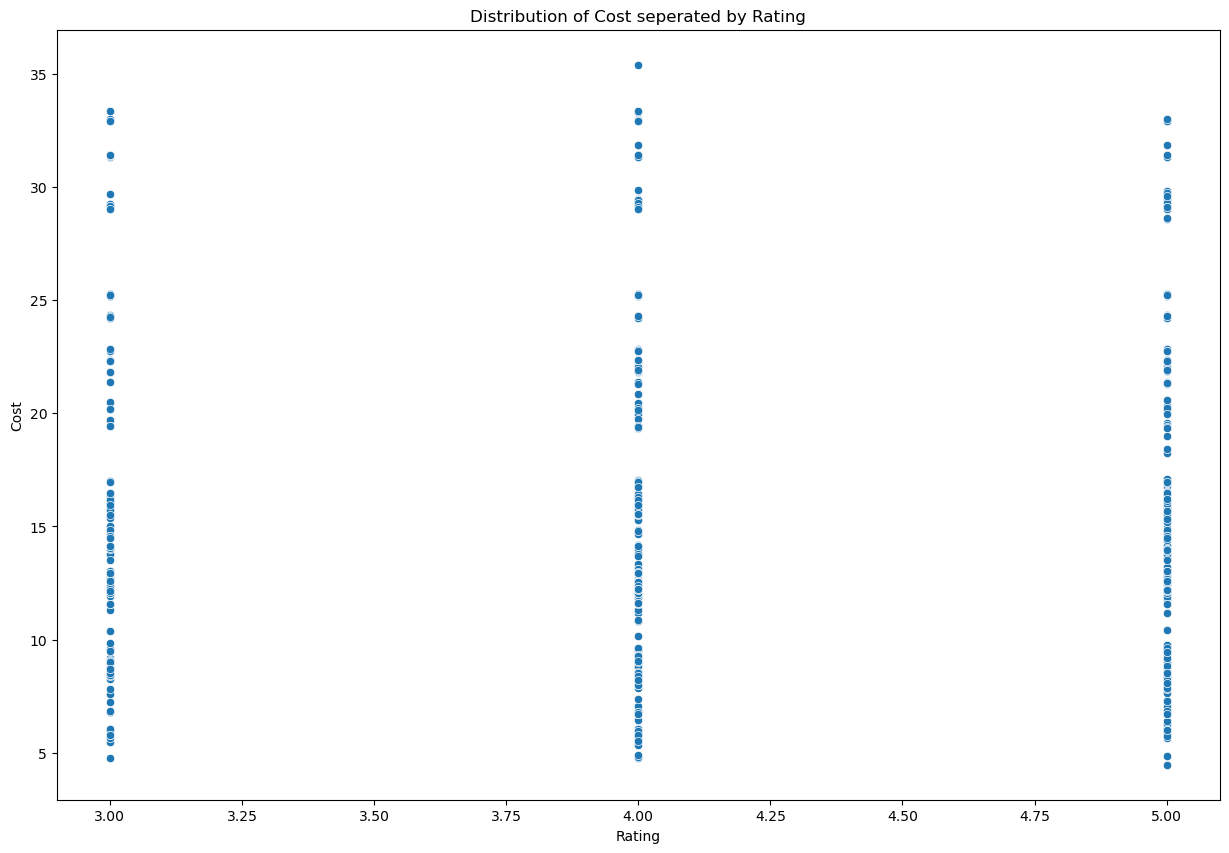

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df,  x='rating', y='cost_of_the_order')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Distribution of Cost seperated by Rating');

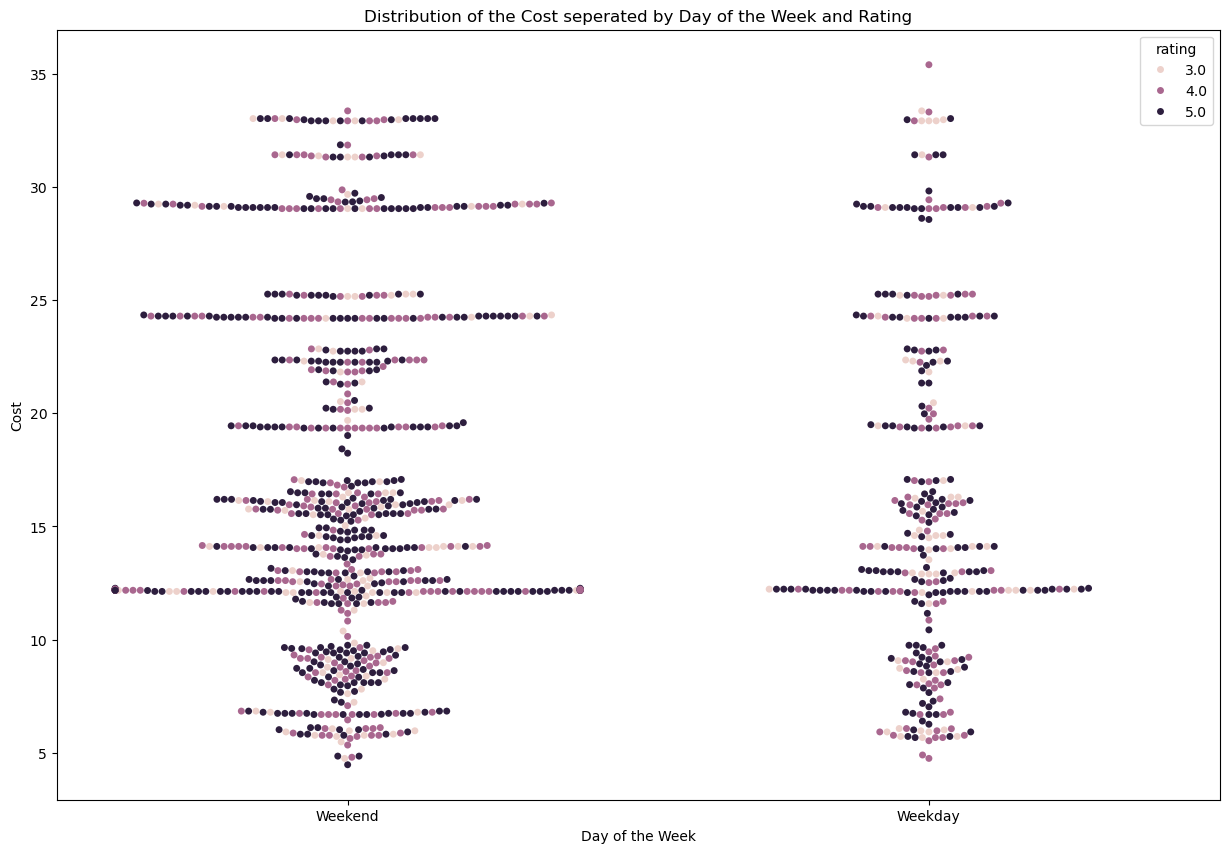

In [32]:
plt.figure(figsize=(15, 10))
sns.swarmplot(data=df,  x='day_of_the_week', y='cost_of_the_order', hue='rating')
plt.xlabel('Day of the Week')
plt.ylabel('Cost')
plt.title('Distribution of the Cost seperated by Day of the Week and Rating');

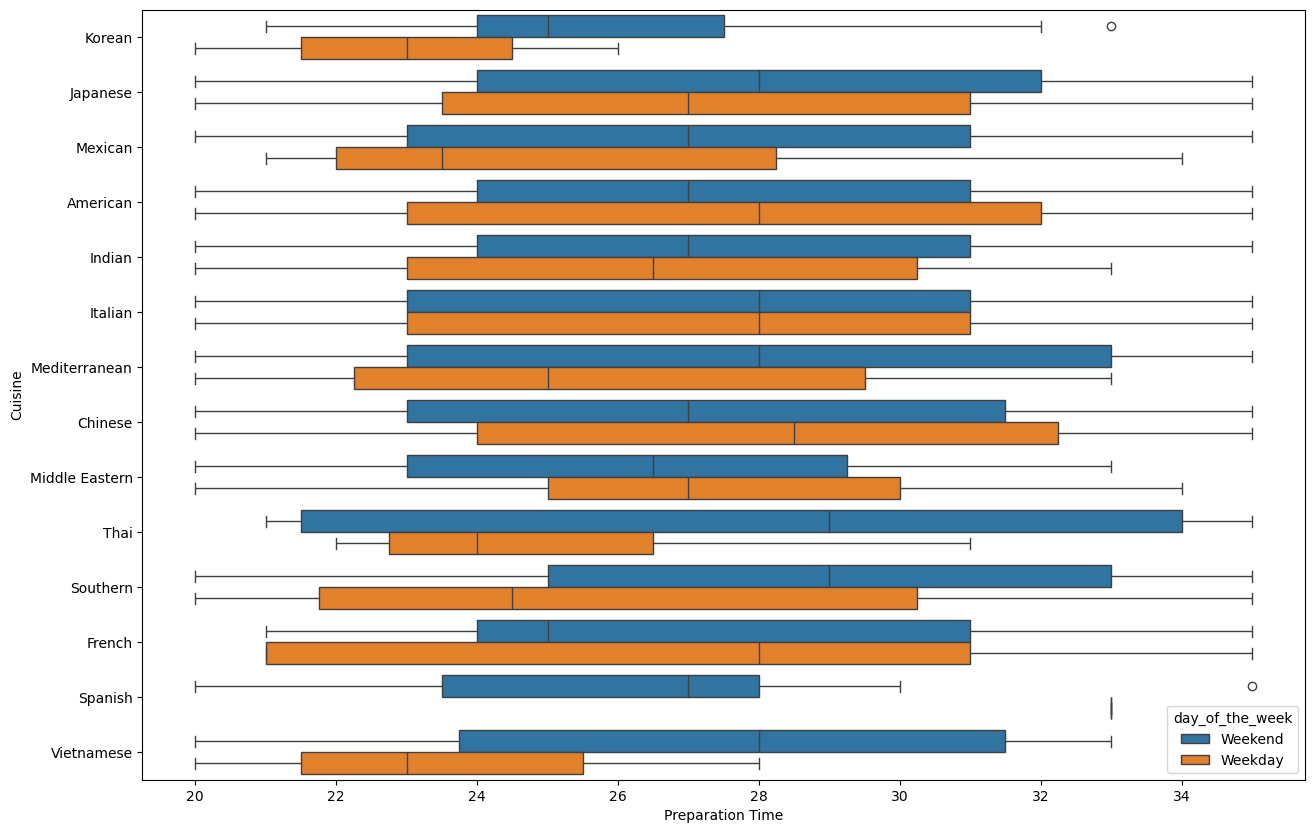

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', hue='day_of_the_week')
plt.xlabel('Preparation Time')
plt.ylabel('Cuisine')
plt.figure('Distribution of Preparation time seperated by Cuisine and Day of the Week');

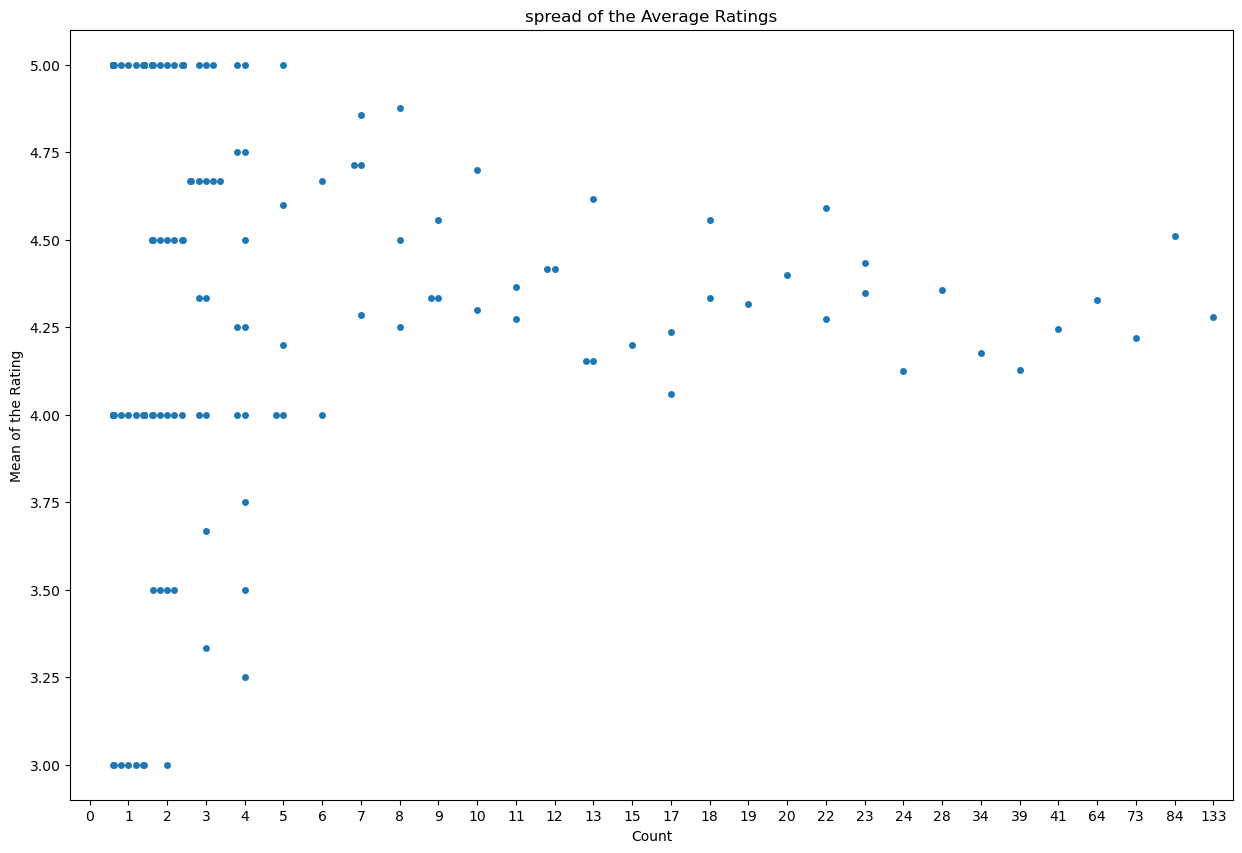

In [34]:
plt.figure(figsize=(15, 10))
sns.swarmplot(data=df.groupby('restaurant_name')['rating'].agg(['count', 'mean']), x='count', y='mean')
plt.xlabel('Count')
plt.ylabel('Mean of the Rating')
plt.title('spread of the Average Ratings');

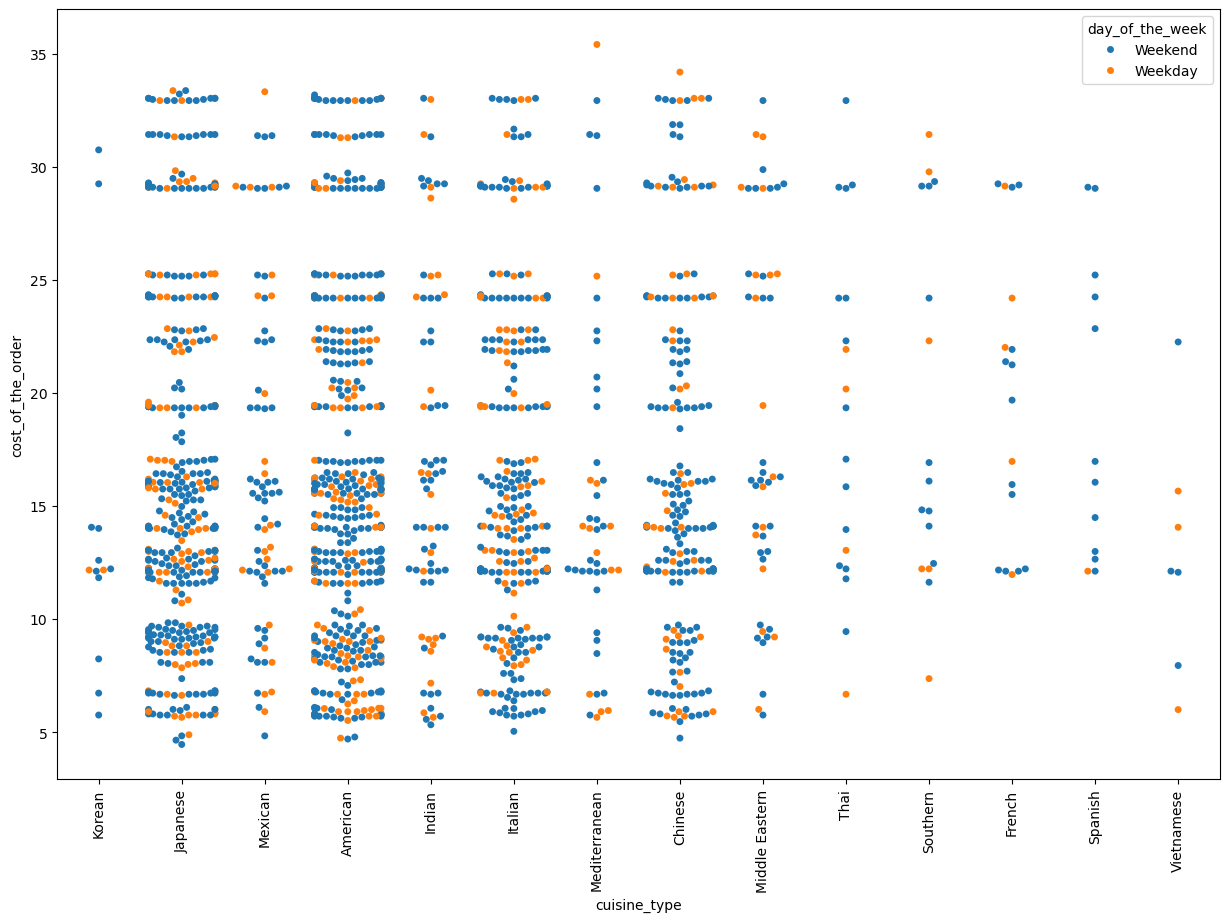

In [35]:
plt.figure(figsize=(15, 10))
sns.swarmplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week')
plt.xticks(rotation=90);

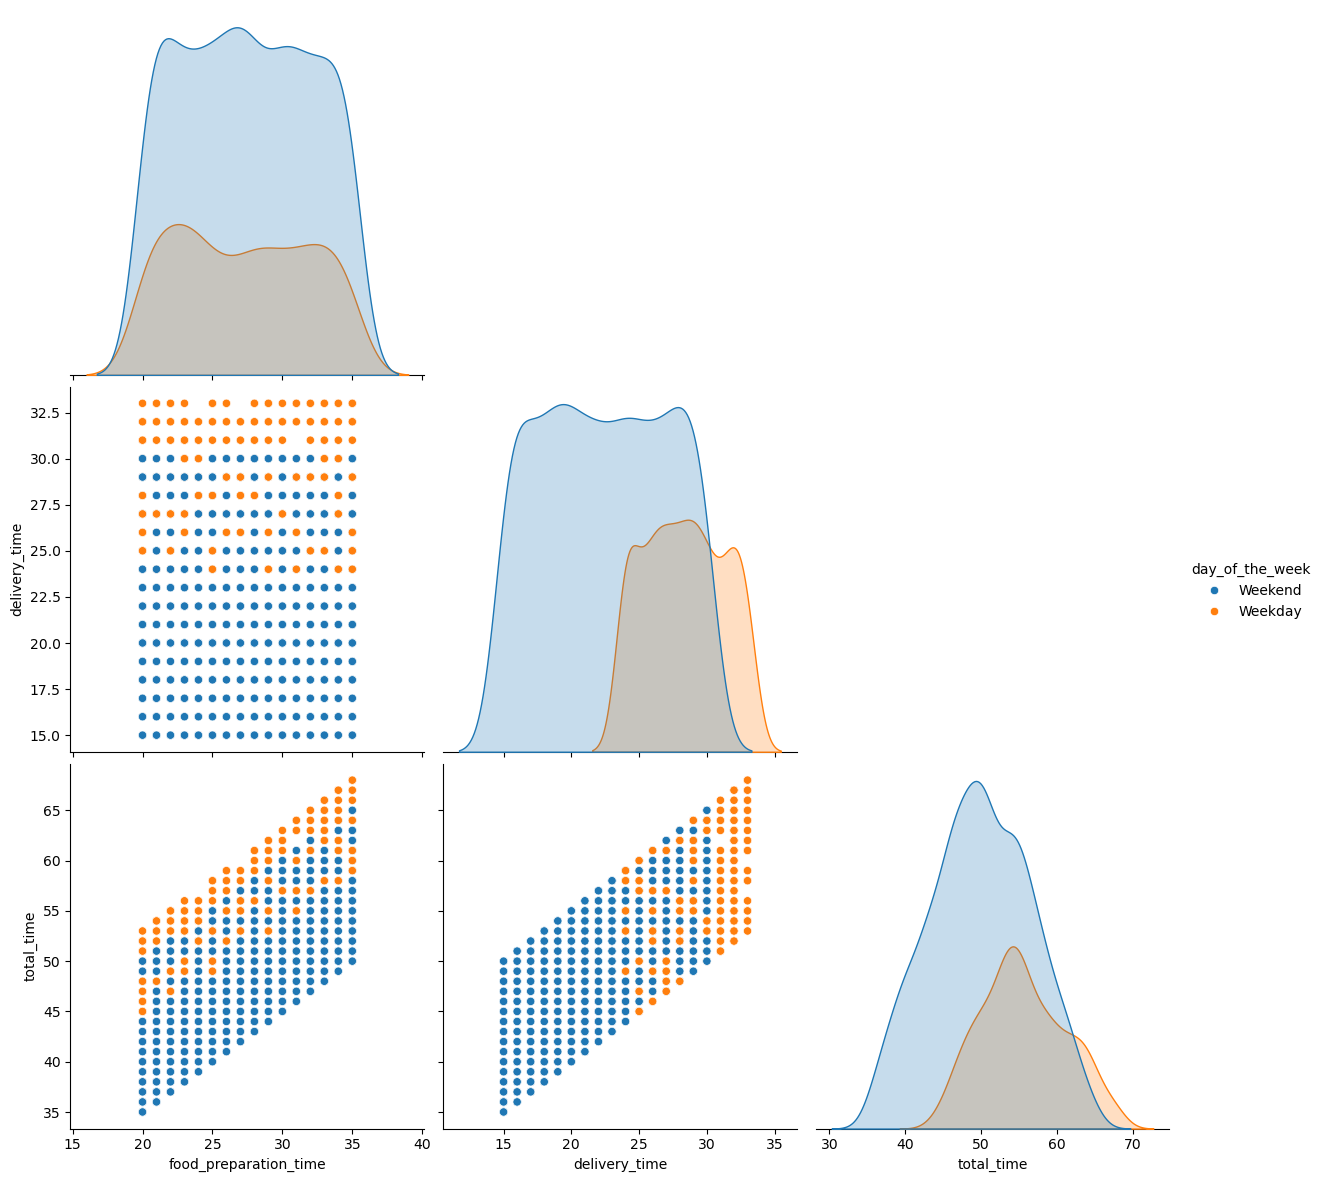

In [36]:
sns.pairplot(data=df, vars=['food_preparation_time', 'delivery_time', 'total_time'], height=4, hue='day_of_the_week', corner=True);

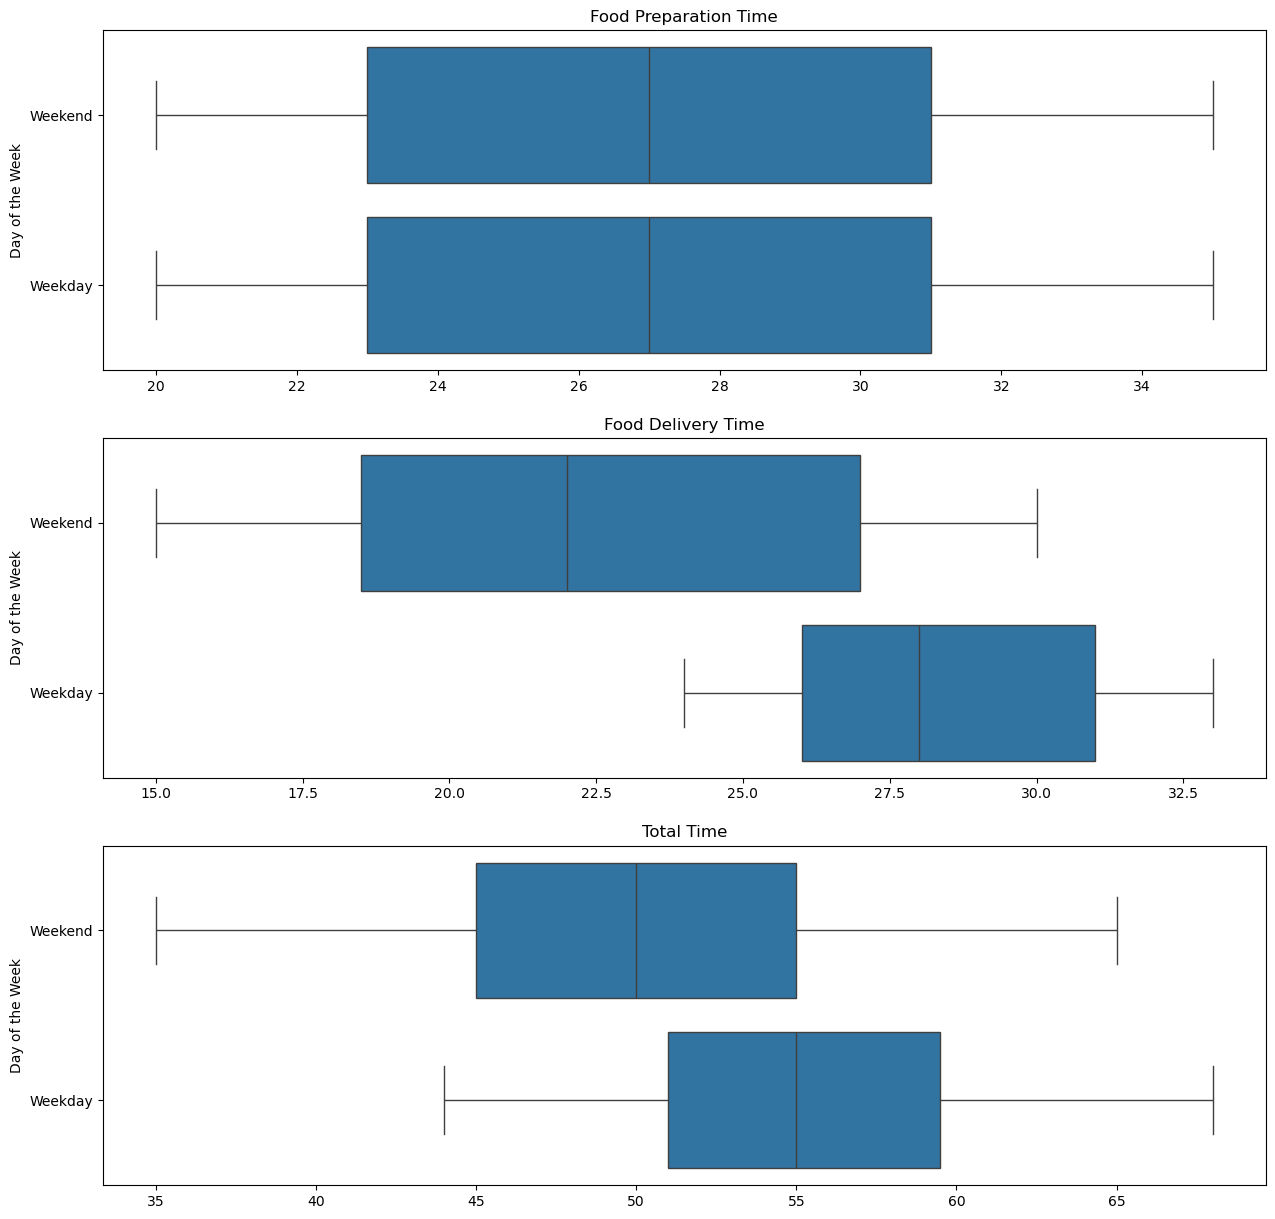

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Day of the Week')
axes[0].set_title('Food Preparation Time')

sns.boxplot(data=df, x='delivery_time', y='day_of_the_week', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Day of the Week')
axes[1].set_title('Food Delivery Time')

sns.boxplot(data=df, x='total_time', y='day_of_the_week', ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('Day of the Week')
axes[2].set_title('Total Time');

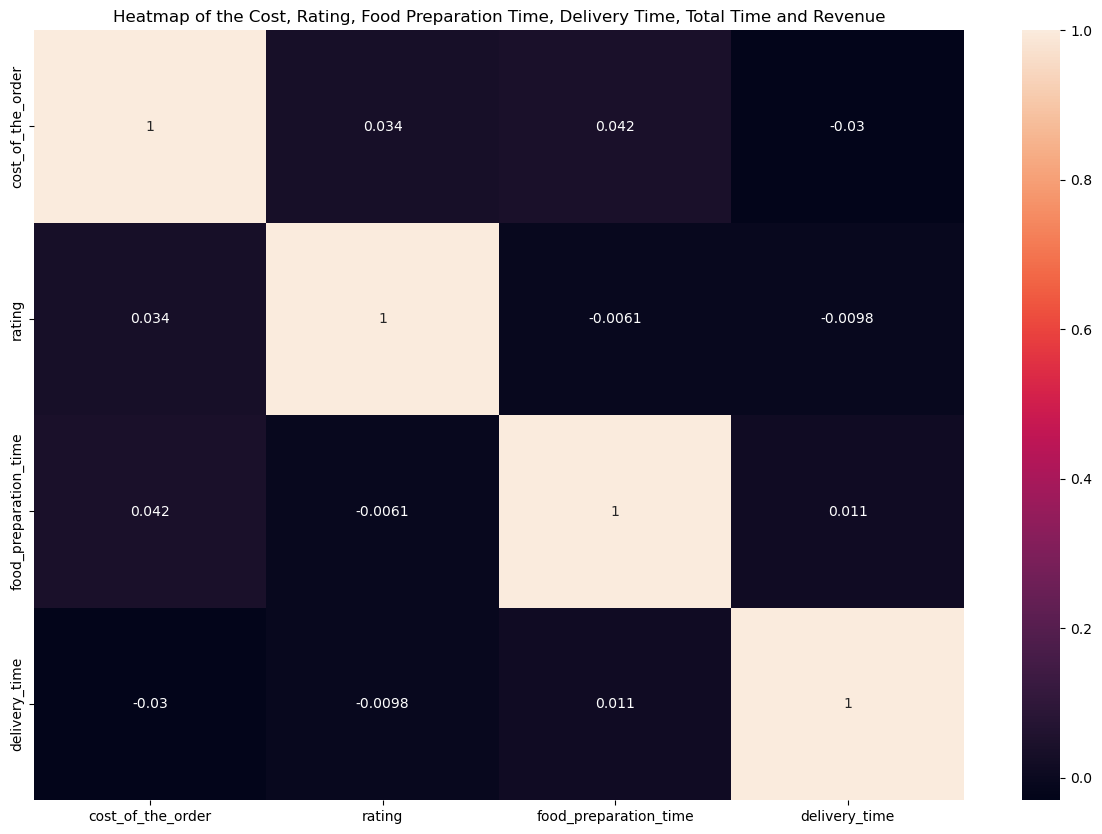

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[
                ['cost_of_the_order','rating', 'food_preparation_time', 'delivery_time']
            ].corr(numeric_only=True), annot=True)
plt.title('Heatmap of the Cost, Rating, Food Preparation Time, Delivery Time, Total Time and Revenue')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [26]:
result = (
    df.groupby('restaurant_name')
    .agg(
        count=('rating', 'count'),
        mean=('rating', 'mean'),
        nan_count=('rating', lambda x: x.isna().sum())
    )
    .query('count > 50 and mean > 4')
)

print(result)

                           count      mean  nan_count
restaurant_name                                      
Blue Ribbon Fried Chicken     64  4.328125         32
Blue Ribbon Sushi             73  4.219178         46
Shake Shack                  133  4.278195         86
The Meatball Shop             84  4.511905         48


In [27]:
# We group restaurants by name and perform the aggregate func on their ratings so that we can pass a 
# querry to see which restaurants have more than 50 reviews that average out to 4 or higher
df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).query('count > 50 and mean > 4')

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
There are 4 restaurants that have more than 50 reviews and have a mean rating higher than ,
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
# We apply a lamda func and create a new column revenue, where the revenue is 25% for orders worth more than 20 and 15% for orders between 6 and 20
df['revenue'] = round(df['cost_of_the_order'].apply(lambda x: x*0.25 if x > 20 else (x*0.15 if x > 5 else 0)), 2)

# We can use the sum func and find the net revenue generated
round(df['revenue'].sum(), 2)

6166.4

#### Observations:
The company will earn a total of 6166.4 from all the orders placed

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
# We find the number of orders where the total time is more than 60 and then divide that by the total number of orders
round(df[df['total_time'] > 60]['order_id'].count()/df['order_id'].count() * 100, 2)

10.54

#### Observations:
Approximately 10.54% of all orders exceed a delivery time of 60 minutes from the moment the order is confirmed until it is delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
# We group by the day of the week so we get the mean delivery times for weekday and weekend seperately
round(df.groupby('day_of_the_week')['delivery_time'].mean())

day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64

#### Observations:
On average, delivery times are 6 minutes longer on weekdays compared to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are a lot of orders that have no ratings.
*  There are 8 very popular restaurants.
*  There are 4 very popular cuisines.
*  The mean amount spent by customers is nearly the same on weekdays and weekends, but the number of orders increases.
*  People prefer the same cuisines on weekdays and weekends.
*  The preparation times for some cuisines increase on weekdays compared to weekends.
*  Most restaurants have an average rating between 4 and 5.
*  The delivery time increases on weekdays compared to weekends.
*  There are no unexpected correlations found among the variables.

### Recommendations:

* Implement a customer feedback program to incentivize reviews, such as discounts on future orders or loyalty points for leaving a rating.
* There are a lot of restaurants that have very few orders but high ratings, we can create a new "hidden gems" list for our users to try.
* We should work with the delivery team to see if it's possible to reduce delivery time on weekdays.
* Given the higher order volume during weekends, consider promotional campaigns to maximize sales during this peak time.
* Develop special lunch offers during weekdays for cuisines with shorter preparation times. This could attract more customers looking for quick meals.
* Since customers prefer the same cuisines on both weekdays and weekends, ensure that these cuisines are consistently available and prominently featured in marketing materials.
* Further investigate the preparation times for different cuisines. Consider optimizing the menu or staff schedules to improve efficiency during peak times.
* Although no unexpected correlations were found, continue to analyze data for insights that may emerge over time, using advanced analytics to uncover hidden relationships among variables.

---